In [109]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns 
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score 

df = pd.read_csv("Dataset//Attrition.csv")

In [110]:
to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 

In [82]:
pd.factorize(df['Attrition'])

for column in df.columns: 
    if not is_numeric_dtype(df[column]): 
        item = df[column] 
        unique = list(df[column].unique()) 
        mapping = dict(zip(unique, range(0, len(unique) + 1))) 
        df[column] = item.map(mapping).astype(int)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsMean
0,52.000000,0,0,593,0,9,4,0,2,0,...,3,0,20,2.0,2,8.0,7,2,13,7.333333
1,36.000000,0,0,1218,0,1,1,1,2,0,...,3,1,21,3.0,3,1.0,8,1,6,5.000000
2,35.906122,0,1,530,1,16,3,1,3,0,...,3,1,7,4.0,3,1.0,5,1,2,2.666667
3,33.000000,0,0,953,0,5,4,2,2,0,...,2,0,12,1.0,3,3.0,7,0,7,4.666667
4,37.252033,0,0,1380,0,9,2,1,3,1,...,3,0,2,2.0,3,10.0,2,2,1,1.666667


In [83]:
item = df['Attrition'] 
unique = list(df['Attrition'].unique()) 
mapping = dict(zip(unique, range(0, len(unique) + 1))) 
print(item)

0       0
1       0
2       0
3       0
4       0
       ..
1171    0
1172    1
1173    0
1174    0
1175    0
Name: Attrition, Length: 1176, dtype: int32


In [130]:
#Executing kmeans on Train dataset, saving sse values on sse_values list
sse_values = list() 
max_k = 30
for k in range(2, max_k + 1): 
    kmeans = KMeans(n_clusters = k, max_iter = 100)
    kmeans.fit(df[to_push_4])
    sse_values.append(kmeans.inertia_)

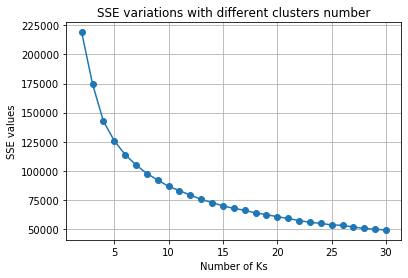

In [131]:
#Calculating best number of clusters using SSE 
plt.plot(range(2, max_k + 1), sse_values, marker = "o")
plt.grid(True)
plt.title("SSE variations with different clusters number")
plt.xlabel("Number of Ks")
plt.ylabel("SSE values")
plt.show()

In [135]:
kmeans = KMeans(n_clusters = 10, max_iter = 100)
kmeans.fit(df[to_push_4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
kmeans.cluster_centers_ 

array([[39.41006061,  5.11049724,  8.66443003,  1.86740331,  4.89502762,
         5.64640884],
       [35.27091501,  5.15311005,  8.53506134,  3.40669856, 12.40191388,
         6.60287081],
       [31.38530998, 20.44078947,  8.38884238,  2.46052632,  7.86184211,
         4.89473684],
       [30.96974672,  4.16883117,  8.2892052 ,  3.8961039 , 26.33766234,
         5.06493506],
       [46.96658588, 23.14473684,  8.97264757,  2.52631579,  9.59210526,
         9.85526316],
       [45.36913372,  5.42253521,  8.93769941,  3.35211268, 23.63380282,
         8.26760563],
       [36.15984369, 23.19607843,  8.49697198,  2.84313725, 23.01960784,
         5.11764706],
       [52.2       ,  5.02352941,  8.94234423,  2.30588235,  8.95294118,
         5.32941176],
       [28.36966184,  5.3236715 ,  8.22552713,  2.26086957,  6.56521739,
         4.34299517],
       [45.83789546,  8.13432836,  9.34018141,  2.52238806,  8.31343284,
        23.05970149]])

In [142]:
df['cluster'] = kmeans.labels_
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsMean,cluster
0,52.000000,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,0,20,2.0,2,8.0,7,2,13,7.333333,5
1,36.000000,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,1,21,3.0,3,1.0,8,1,6,5.000000,3
2,35.906122,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,1,7,4.0,3,1.0,5,1,2,2.666667,2
3,33.000000,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,0,12,1.0,3,3.0,7,0,7,4.666667,1
4,37.252033,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,0,2,2.0,3,10.0,2,2,1,1.666667,0


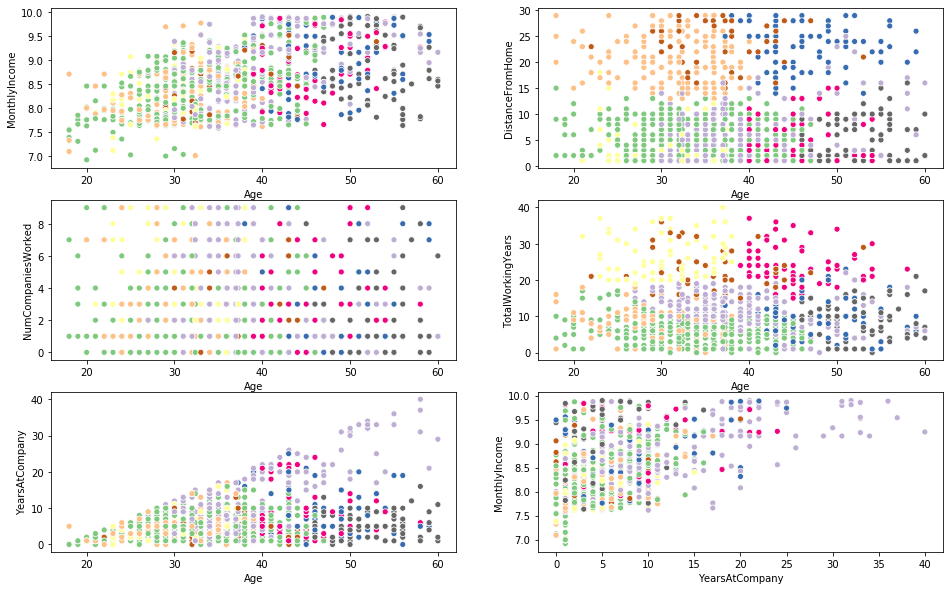

In [152]:
import seaborn as sns 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (16,10))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df, hue = "cluster", ax = ax1, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "DistanceFromHome", data = df, hue = "cluster", ax = ax2, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "NumCompaniesWorked", data = df, hue = "cluster", ax = ax3, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "TotalWorkingYears", data = df, hue = "cluster", ax = ax4, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "YearsAtCompany", data = df, hue = "cluster", ax = ax5, palette = "Accent", legend=False)
sns.scatterplot(x = "YearsAtCompany", y = "MonthlyIncome", data = df, hue = "cluster", ax = ax6, palette = "Accent", legend=False)

In [ ]:
sns.pairplot(data = df, hue = "cluster", palette = "Accent")
plt.show()

In [6]:
######DBSCAN SIDE # metrica euclidea
# Provato più sottoinsiemi 3,5,10 e 15 rigirati in tutte le salse, doppio loop di eps e min_samples
# ma rimane sempre un unico cluster

In [239]:
%matplotlib inline

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/attrition.csv")

In [241]:
to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 


dfx=df[to_push_3]
X = StandardScaler().fit_transform(dfx.values)

In [242]:
#Compute DBSCAN

m=4
for k in np.arange(1.6,4,0.1):
    db = DBSCAN(eps=k, min_samples=m).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(f"Eps:{k} MinSamples:{m}")
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
    print(np.unique(db.labels_,return_counts=True))
    print("\n")


Eps:1.6 MinSamples:4
Estimated number of clusters: 4
Estimated number of noise points: 286
Silhouette Coefficient: -0.045
(array([-1,  0,  1,  2,  3]), array([286, 877,   3,   6,   4]))


Eps:1.7000000000000002 MinSamples:4
Estimated number of clusters: 4
Estimated number of noise points: 222
Silhouette Coefficient: 0.015
(array([-1,  0,  1,  2,  3]), array([222, 941,   4,   5,   4]))


Eps:1.8000000000000003 MinSamples:4
Estimated number of clusters: 4
Estimated number of noise points: 162
Silhouette Coefficient: 0.115
(array([-1,  0,  1,  2,  3]), array([ 162, 1003,    4,    4,    3]))


Eps:1.9000000000000004 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 117
Silhouette Coefficient: 0.140
(array([-1,  0,  1,  2]), array([ 117, 1051,    4,    4]))


Eps:2.0000000000000004 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 76
Silhouette Coefficient: 0.135
(array([-1,  0,  1,  2]), array([  76, 1092,    4,    4]))


Eps:2.1000

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

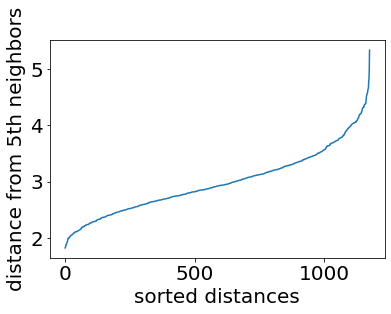

In [220]:
from scipy.spatial.distance import pdist, squareform

dist = pdist(X,"euclidean")
dist = squareform(dist)

k = 5
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot( range(0,len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from 5th neighbors',fontsize=20)
plt.xlabel('sorted distances', fontsize=20)

plt.tick_params(axis='both',labelsize=20)

In [263]:
###DBSCAN2 metric:minkowski grado 3 ma ancora un solo cluster

%matplotlib inline

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/attrition.csv")

to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 


dfx=df[to_push_3]

In [271]:
#Compute DBSCAN

db = DBSCAN(eps=4, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=3)
arr = db.fit_predict(dfx)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#print(f"Eps:{k} MinSamples:{m}")
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
print(np.unique(db.labels_,return_counts=True))
print("\n")

Estimated number of clusters: 57
Estimated number of noise points: 330
Silhouette Coefficient: -0.287
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56]), array([330, 696,   7,   2,   2,   2,   3,   2,   3,   2,   2,   4,   5,
         2,   2,   2,   2,   2,   2,  10,   7,   2,   2,   2,   2,   3,
         2,   3,   2,   4,   3,   2,   2,   2,   2,   4,   2,   2,   2,
         2,   3,   2,   2,   2,   3,   2,   2,   2,   5,   2,   2,   3,
         2,   2,   2,   2,   2,   2]))


